# Simple Linear Regression
#### In this notebook, we will build a linear regression model to predict sales using appropriate predictor variable

## Step 1 - Reading and Understanding the data

Let's start with the following steps
1. Import the data using pandas
2. understand the structure of the data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [74]:
# read the data
ads = pd.read_csv('advertising.csv')

In [75]:
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [76]:
ads.shape

(200, 4)

In [77]:
# see if there are any missing values
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [78]:
# summary stats
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


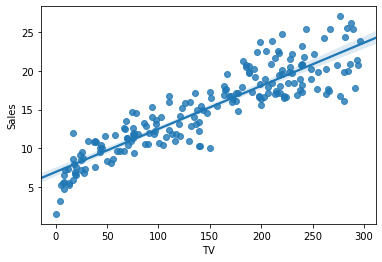

In [79]:
# visualize the data
sns.regplot(x='TV',y='Sales',data=ads)

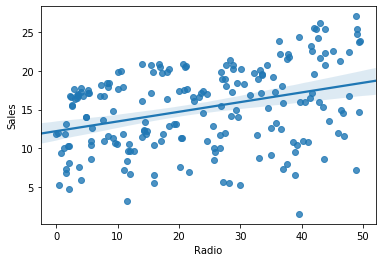

In [80]:
sns.regplot(x='Radio',y='Sales',data=ads)

##### Not as smooth as we found in TV

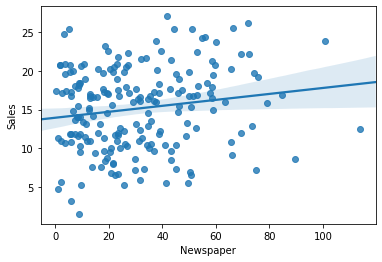

In [81]:
sns.regplot(x='Newspaper',y='Sales',data=ads)

##### Even worse than Radio

## A better way is to do a pairplot

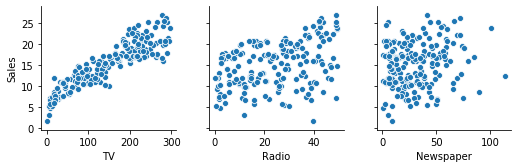

In [82]:
sns.pairplot(data = ads,
            x_vars=['TV','Radio','Newspaper'],
            y_vars = 'Sales')

In [83]:
ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


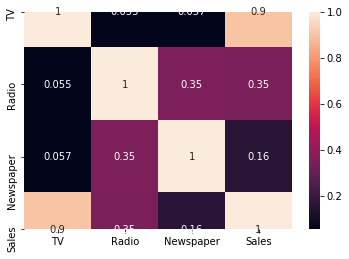

In [84]:
# a better way to understand the correlation is to draw a heatmap
sns.heatmap(ads.corr(),annot=True)

(4.0, 0.0)

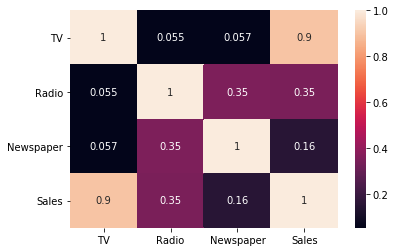

In [85]:
ax = sns.heatmap(ads.corr(),annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### Linear Regression model

We will do with TV and Sales<br>

y = c + m1x1 + m2x2 + .. + mnxn <br>

y = response <br>
c = constant <br>
m1..mn = model coefficients/parameters of the features <br>

In our case <br>

y = c + m1 x TV

### Steps involved

- Create X and y
- Create Train and Test sets - (70-30, 80-20)
- Train your model on the training set (i.e. to learn the coefficients)
- Perform Residual analysis - check if the errors are normally distributed with mean = 0
- Evaluate the model on (training set, test set)

In [86]:
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [87]:
# create X and y
X = ads['TV']
y = ads['Sales']

In [88]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [89]:
X_train.shape

(140,)

In [90]:
# train the model
# first we will use statsmodels
# In statsmodels, the model by default excludes the constant, hence we need to add it explicitly

X_train_sm = sm.add_constant(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [91]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [92]:
# y(old) = c + m1.X1
# y(new) = c.const (which is basically 1) + m1.X1
# the model will learn y(new)

In [93]:
# fitting the model - which means the model is going to learn the coefficient m1 from the dataset
# OLS = Ordinary Least Squares

# Create a linear regression object 
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

In [94]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [95]:
# Sales = 6.94 + 0.05 * TV
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 27 May 2020   Prob (F-statistic):           1.52e-52
Time:                        04:55:26   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# 1. coef
# 2. p-value => since p-value is so less, it means we can reject Ho : beta 1 = 0; that means X and y are highly correlated
# 3. R2 => The variance in sales is 81.6% dependent on TV
# 4. Prob (F-statistic) => This is so low - the fit is not by chance

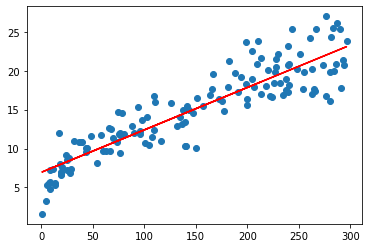

In [97]:
# plot the training data that we fed to the model
plt.scatter(X_train, y_train)
# plot what model generates
plt.plot(X_train, 6.9487 + 0.0545 * X_train, 'r')
plt.show()

In [98]:
# Residual analysis - check if the error is normally distributed.
# We perform the residual analysis on training dataset
# error = y_train - y_train_pred

In [99]:
# Predict on training dataset which is same as y_train_pred = 6.9487 + 0.0545 * X_train
y_train_pred = lr_model.predict(X_train_sm)

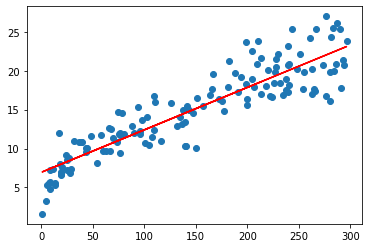

In [100]:
# plot the training data that we fed to the model
plt.scatter(X_train, y_train)
# plot what model generates
plt.plot(X_train, y_train_pred, 'r')
plt.show()

It is the same graph

In [101]:
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [102]:
# now we can do the error analysis
res = y_train - y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

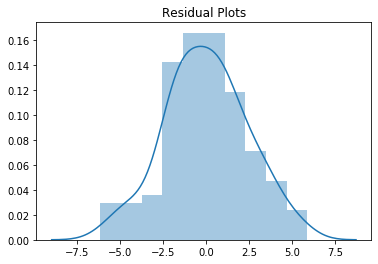

In [103]:
plt.figure()
plt.title('Residual Plots')
sns.distplot(res)

#### Residuals are following normal distribution with mean = 0. <br>
#### Hence we can say => The fundamental assumption of Linear regression is respected

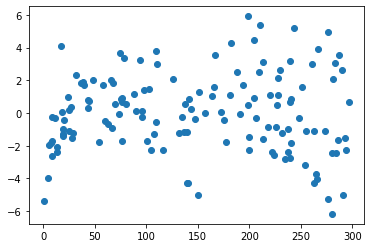

In [104]:
# Look for patterns in residuals (We should not be able to identify any patterns)
plt.figure()
plt.scatter(X_train, res)
plt.show()

### We conclude Linear Regression is a good fit. And we can proceed to make predictions on the test set

In [105]:
# make prediction of the test set (y_test_pred)
# evaluate the model - r-squared

In [106]:
# add a constant on test set like we have done before
X_test_sm = sm.add_constant(X_test)

# Make predictions on test
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [107]:
# evaluate the model - r-squared
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)

In [108]:
r2

0.7921031601245657

In [109]:
# mean squared error
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826957

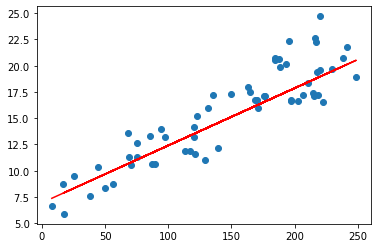

In [110]:
# plot the test data
plt.scatter(X_test, y_test)

# plot what model generates on test data
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Linear Regression using sklearn

In [111]:
# create X and y
X = ads['TV']
y = ads['Sales']

In [112]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state=100)

In [113]:
# reshape X_train
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [114]:
# steps in sklearn model building

# 1. create an object of linear regression
lm = LinearRegression()

# 2. fit the model
lm.fit(X_train_lm,y_train)

# it thows error because it is expecting the data to be array (140,1) and not (140,). We need to reshape X_train to (140,1)
# we reshaped on top of this cell

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
# 3. see the params, make predictions (train and test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.94868320000136


In [116]:
# 4. Make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [117]:
# 5. Evaluate the model
# evaluate the model - r-squared
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8157933136480388
0.792103160124566


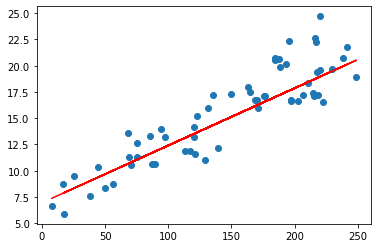

In [118]:
# show the output
plt.figure()

# plot the test data
plt.scatter(X_test, y_test)

# plot what model generates on test data
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [119]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [120]:
r2 = corrs[0,1] ** 2

In [121]:
r2

0.8157933136480386